In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [28]:
n_features = 10
n_dense_neuros = 3

In [29]:
x = tf.placeholder(tf.float32,(None,n_features))

In [30]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neuros]))

In [31]:
b = tf.Variable(tf.ones([n_dense_neuros]))

In [32]:
xW = tf.matmul(x,W)

In [33]:
z = tf.add(xW,b)

In [34]:
a = tf.sigmoid(z)

In [35]:
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [37]:
print(layer_out)

[[0.7835434  0.9350139  0.21440937]]


In [38]:
## Simple regression example

In [39]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [40]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

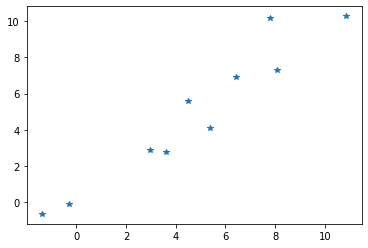

In [42]:
plt.plot(x_data,y_label,'*')

In [47]:
a = tf.Variable(0.44)
b = tf.Variable(0.87) 
error = 0

In [48]:
for x,y in zip(x_data,y_label):
    y_hat = a*x + b
    error += (y-y_hat)**2

In [49]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [50]:
init = tf.global_variables_initializer()


In [55]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        sess.run(train)
        
    final_slope, final_initercept = sess.run([a,b])

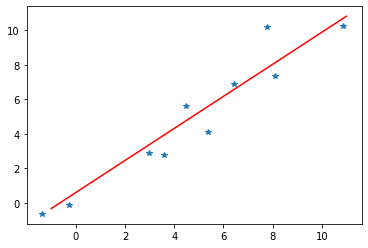

In [56]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_initercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')